<a href="https://colab.research.google.com/github/ipeirotis-org/academiabot/blob/master/ERCOT/ERCOT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

http://www.ercot.com/gridinfo/load

The archives are also there:
http://www.ercot.com/gridinfo/load/load_hist

There is a difference between the archives and real time, as I have learned :) The real time is based on telemetry substation data, whereas the historical is based on final values. This usually accounts for about a 1% difference, mostly white noise. It would be a good exercise for students to both correct this historical bias and also build timeseries forecasting models on this live data feed. ERCOT also publishes their own load forecasts, so you can use that as a good baseline for any model.

In [42]:
!sudo apt-get install unzip
!pip install -U pip


# You need to change the project_id to your own Google Cloud project
project_id = "nyu-datasets" # <<<<<< CHANGE THIS

from google.colab import auth
from google.cloud import bigquery

auth.authenticate_user()

client = bigquery.Client(project=project_id)

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
unzip is already the newest version (6.0-26ubuntu3.2).
0 upgraded, 0 newly installed, 0 to remove and 41 not upgraded.


In [43]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [44]:
#@title Plotting Setup

%config InlineBackend.figure_format = 'retina'

import pandas as pd
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt

# Change the graph defaults
plt.rcParams['figure.figsize'] = (8, 3)  # Default figure size of 8x3 inches
plt.rcParams['axes.grid'] = True
plt.rcParams['grid.color'] = 'lightgray'
plt.rcParams['font.size'] = 10  # Default font size of 12 points
plt.rcParams['lines.linewidth'] = 1  # Default line width of 1 points
plt.rcParams['lines.markersize'] = 2  # Default marker size of 2 points
plt.rcParams['legend.fontsize'] = 10  # Default legend font size of 10 points

In [45]:
import datetime as dt

def str_to_datetime(date_str):
    if date_str.endswith("24:00"):
        return pd.to_datetime(date_str[:10], format="%m/%d/%Y") + dt.timedelta(days=1)
    else:
        return pd.to_datetime(date_str, format="%m/%d/%Y %H:%M")

# 2024

In [46]:
!curl "https://www.ercot.com/files/docs/2024/02/06/Native_Load_2024.zip" -o native_load_2024.zip
!unzip -o native_load_2024.zip

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 1062k  100 1062k    0     0  5569k      0 --:--:-- --:--:-- --:--:-- 5565k
Archive:  native_load_2024.zip
  inflating: Native_Load_2024.xlsx   


In [47]:
df2024 = pd.read_excel("Native_Load_2024.xlsx")

In [48]:
df2024["Hour Ending"] = df2024["Hour Ending"].astype(str)

In [49]:
import re
for g in df2024["Hour Ending"].values:
  try:
    if not re.match(r"^\d\d/\d\d/\d\d\d\d \d\d:\d\d$",g):
        print(g)
  except:
    print(f"_{g}_")

11/03/2024 02:00 DST


In [50]:
df2024["Hour Ending"].replace("11/03/2024 02:00 DST", "11/03/2024 02:00", inplace=True)


/tmp/ipython-input-3645444191.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df2024["Hour Ending"].replace("11/03/2024 02:00 DST", "11/03/2024 02:00", inplace=True)


In [51]:
df2024['date'] = df2024["Hour Ending"].astype(str).apply(str_to_datetime)
df2024.drop('Hour Ending', inplace=True, axis='columns')
df2024.set_index('date', inplace=True)

df2024.sort_index(inplace=True)

### 2023

In [52]:
!curl "https://www.ercot.com/files/docs/2023/02/09/Native_Load_2023.zip" -o native_load_2023.zip
!unzip -o native_load_2023.zip

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 1065k  100 1065k    0     0  4339k      0 --:--:-- --:--:-- --:--:-- 4348k
Archive:  native_load_2023.zip
  inflating: Native_Load_2023.xlsx   


In [53]:
df2023 = pd.read_excel("Native_Load_2023.xlsx")

In [54]:
df2023.dtypes

,0
Hour Ending,object
COAST,float64
EAST,float64
FWEST,float64
NORTH,float64
NCENT,float64
SOUTH,float64
SCENT,float64
WEST,float64
ERCOT,float64


In [55]:
df2023["Hour Ending"] = df2023["Hour Ending"].astype(str)

In [56]:
import re
for g in df2023["Hour Ending"].values:
  try:
    if not re.match(r"^\d\d/\d\d/\d\d\d\d \d\d:\d\d$",g):
        print(g)
  except:
    print(f"_{g}_")

11/05/2023 02:00 DST


In [57]:
df2023["Hour Ending"].replace("11/05/2023 02:00 DST", "11/05/2023 02:00", inplace=True)


/tmp/ipython-input-4036882023.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df2023["Hour Ending"].replace("11/05/2023 02:00 DST", "11/05/2023 02:00", inplace=True)


In [58]:
df2023['date'] = df2023["Hour Ending"].astype(str).apply(str_to_datetime)
df2023.drop('Hour Ending', inplace=True, axis='columns')
df2023.set_index('date', inplace=True)

df2023.sort_index(inplace=True)

In [59]:
df2023

,COAST,EAST,FWEST,NORTH,NCENT,SOUTH,SCENT,WEST,ERCOT
date,,,,,,,,,
2023-01-01 01:00:00,8514.637876,1218.506271,5073.526557,917.394049,9896.757586,2859.017922,6012.400469,1116.933155,35609.173887
2023-01-01 02:00:00,8345.632899,1179.885576,5016.774637,906.854582,9675.869720,2845.779210,5934.084260,1107.417972,35012.298856
2023-01-01 03:00:00,8125.706879,1151.144653,5016.303220,894.817013,9490.332365,2734.163642,5855.790279,1101.324245,34369.582295
2023-01-01 04:00:00,7995.083655,1153.306928,5038.003823,891.733538,9420.890470,2555.339795,5840.914307,1105.457821,34000.730337
2023-01-01 05:00:00,7906.920393,1168.779618,4994.502755,896.893843,9430.780728,2484.777679,5873.683697,1108.739956,33865.078669
...,...,...,...,...,...,...,...,...,...
2023-12-31 20:00:00,11918.024426,1499.025843,6126.267426,1254.822945,12423.897835,3403.832421,6972.382083,1152.985583,44751.238564
2023-12-31 21:00:00,11634.439863,1500.317000,6140.141144,1245.641978,12226.078295,3247.225591,6742.135888,1156.842391,43892.822150
2023-12-31 22:00:00,11360.099483,1469.102629,6173.751239,1266.036106,12039.301095,3114.176086,6518.290964,1172.912329,43113.669932


### 2022

In [60]:
!curl "https://www.ercot.com/files/docs/2022/02/08/Native_Load_2022.zip" -o native_load_2022.zip
!unzip -o native_load_2022.zip

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 1067k  100 1067k    0     0  6631k      0 --:--:-- --:--:-- --:--:-- 6674k
Archive:  native_load_2022.zip
  inflating: Native_Load_2022.xlsx   


In [61]:
df2022 = pd.read_excel("Native_Load_2022.xlsx")

In [62]:
df2022.dtypes

,0
Hour Ending,object
COAST,float64
EAST,float64
FWEST,float64
NORTH,float64
NCENT,float64
SOUTH,float64
SCENT,float64
WEST,float64
ERCOT,float64


In [63]:
df2022.head()

,Hour Ending,COAST,EAST,FWEST,NORTH,NCENT,SOUTH,SCENT,WEST,ERCOT
0,01/01/2022 01:00,12054.939199,1302.296674,4161.193625,757.843076,9676.300802,3172.878316,5908.031505,973.455700,38006.938896
1,01/01/2022 02:00,11793.290315,1259.355201,4147.907009,737.236591,9307.126712,3123.318608,5708.512022,959.775908,37036.522365
2,01/01/2022 03:00,11460.841252,1210.287905,4156.412366,725.610502,8920.424552,3003.396233,5463.522829,941.112359,35881.607998
3,01/01/2022 04:00,11244.980243,1179.311517,4149.811722,717.420214,8678.807826,2898.097471,5255.252404,920.373708,35044.055105
4,01/01/2022 05:00,11073.085585,1171.841803,4140.619028,719.178247,8573.370608,2825.100402,5164.172158,918.203309,34585.571140


In [64]:
df2022["Hour Ending"] = df2022["Hour Ending"].astype(str)

In [65]:
import re
for g in df2022["Hour Ending"].values:
  try:
    if not re.match(r"^\d\d/\d\d/\d\d\d\d \d\d:\d\d$",g):
        print(g)
  except:
    print(f"_{g}_")

11/06/2022 02:00 DST
2022-12-01 01:00:00


In [66]:
df2022["Hour Ending"].replace("11/06/2022 02:00 DST", "11/06/2022 02:00", inplace=True)
df2022["Hour Ending"].replace("2022-12-01 01:00:00", "12/01/2022 01:00", inplace=True)

/tmp/ipython-input-1988355667.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df2022["Hour Ending"].replace("11/06/2022 02:00 DST", "11/06/2022 02:00", inplace=True)
/tmp/ipython-input-1988355667.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[co

In [67]:
df2022['date'] = df2022["Hour Ending"].astype(str).apply(str_to_datetime)
df2022.drop('Hour Ending', inplace=True, axis='columns')
df2022.set_index('date', inplace=True)

df2022.sort_index(inplace=True)

### 2021

In [68]:
!curl "https://www.ercot.com/files/docs/2021/11/12/Native_Load_2021.zip" -o native_load_2021.zip
!unzip -o native_load_2021.zip

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 1068k  100 1068k    0     0  7831k      0 --:--:-- --:--:-- --:--:-- 7859k
Archive:  native_load_2021.zip
  inflating: Native_Load_2021.xlsx   


In [69]:
df2021 = pd.read_excel("Native_Load_2021.xlsx")

In [70]:
df2021.dtypes

,0
Hour Ending,object
COAST,float64
EAST,float64
FWEST,float64
NORTH,float64
NCENT,float64
SOUTH,float64
SCENT,float64
WEST,float64
ERCOT,float64


In [71]:
import re
for g in df2021["Hour Ending"].values:
    if not re.match(r"^\d\d/\d\d/\d\d\d\d \d\d:\d\d$",g):
        print(g)

11/07/2021 02:00 DST


In [72]:
df2021["Hour Ending"].replace("11/07/2021 02:00 DST", "11/07/2021 02:00", inplace=True)

/tmp/ipython-input-3885545411.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df2021["Hour Ending"].replace("11/07/2021 02:00 DST", "11/07/2021 02:00", inplace=True)


In [73]:
df2021['date'] = df2021["Hour Ending"].apply(str_to_datetime)
df2021.drop('Hour Ending', inplace=True, axis='columns')
df2021.set_index('date', inplace=True)

df2021.sort_index(inplace=True)

### 2020

In [74]:
!curl "https://www.ercot.com/files/docs/2021/01/12/Native_Load_2020.zip" -o native_load_2020.zip
!unzip -o native_load_2020.zip

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 1074k  100 1074k    0     0  7330k      0 --:--:-- --:--:-- --:--:-- 7357k
Archive:  native_load_2020.zip
  inflating: Native_Load_2020.xlsx   


In [75]:
df2020 = pd.read_excel("Native_Load_2020.xlsx")
df2020

,HourEnding,COAST,EAST,FWEST,NORTH,NCENT,SOUTH,SCENT,WEST,ERCOT
0,01/01/2020 01:00,9890.091522,1364.278198,3721.972022,773.878822,11719.863767,2707.841517,5473.246071,1172.943179,36824.115099
1,01/01/2020 02:00,9751.586415,1369.569694,3735.514034,775.063743,11639.455987,2706.844837,5387.380467,1165.951313,36531.366488
2,01/01/2020 03:00,9603.421087,1373.528720,3735.851866,774.153775,11515.421981,2650.378864,5270.331958,1149.076769,36072.165020
3,01/01/2020 04:00,9501.585599,1365.630426,3743.517881,778.097301,11518.359020,2586.709109,5200.960612,1141.301918,35836.161867
4,01/01/2020 05:00,9499.426925,1385.600323,3753.898979,784.077729,11649.293449,2548.852381,5230.298774,1147.094161,35998.542722
...,...,...,...,...,...,...,...,...,...,...
8779,12/31/2020 20:00,12068.071946,1788.474092,3979.115067,1005.372994,16508.360213,3718.100777,8640.867717,1640.840548,49349.203353
8780,12/31/2020 21:00,11818.903690,1726.770658,3962.905180,969.428095,15752.272222,3637.379800,8505.529827,1607.467424,47980.656897
8781,12/31/2020 22:00,11560.408167,1680.800823,3925.708218,928.517370,15179.536570,3571.725609,8334.601541,1573.542580,46754.840878
8782,12/31/2020 23:00,11339.877692,1627.080961,3895.376959,891.856675,14650.060694,3524.972799,8024.802495,1521.383987,45475.412261


In [76]:
df2020["HourEnding"].replace("11/01/2020 02:00 DST", "11/01/2020 02:00", inplace=True)
df2020['date'] = df2020["HourEnding"].apply(str_to_datetime)
df2020.drop('HourEnding', inplace=True, axis='columns')
df2020.set_index('date', inplace=True)

df2020.sort_index(inplace=True)

/tmp/ipython-input-273689543.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df2020["HourEnding"].replace("11/01/2020 02:00 DST", "11/01/2020 02:00", inplace=True)


### 2019

In [77]:
!curl "https://www.ercot.com/files/docs/2020/01/09/Native_Load_2019.zip" -o native_load_2019.zip
!unzip -o native_load_2019.zip

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 1067k  100 1067k    0     0  3339k      0 --:--:-- --:--:-- --:--:-- 3334k
Archive:  native_load_2019.zip
  inflating: Native_Load_2019.xlsx   


In [78]:
df2019 = pd.read_excel("Native_Load_2019.xlsx")



In [79]:
import re
for g in df2019["HourEnding"].values:
    if not re.match(r"^\d\d/\d\d/\d\d\d\d \d\d:\d\d$",g):
        print(g)

11/03/2019 02:00 DST


In [80]:
df2019["HourEnding"].replace("11/03/2019 02:00 DST", "11/03/2019 02:00", inplace=True)

/tmp/ipython-input-2979307423.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df2019["HourEnding"].replace("11/03/2019 02:00 DST", "11/03/2019 02:00", inplace=True)


In [81]:
len(df2019)

8760

In [82]:
df2019['date'] = df2019["HourEnding"].apply(str_to_datetime)
df2019.drop('HourEnding', inplace=True, axis='columns')
df2019.set_index('date', inplace=True)

df2019.sort_index(inplace=True)

### 2018

In [83]:
!curl "https://www.ercot.com/files/docs/2019/01/07/native_load_2018.zip" -o native_load_2018.zip
!unzip -o native_load_2018.zip

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 1067k  100 1067k    0     0  3761k      0 --:--:-- --:--:-- --:--:-- 3772k
Archive:  native_load_2018.zip
  inflating: Native_Load_2018.xlsx   


In [84]:
df2018 = pd.read_excel("Native_Load_2018.xlsx")


In [85]:
import re
for g in df2018["HourEnding"].values:
    if not re.match(r"^\d\d/\d\d/\d\d\d\d \d\d:\d\d$",g):
        print(g)

11/04/2018 02:00 DST


In [86]:
df2018["HourEnding"].replace("11/04/2018 02:00 DST", "11/04/2018 02:00", inplace=True)

/tmp/ipython-input-2915552327.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df2018["HourEnding"].replace("11/04/2018 02:00 DST", "11/04/2018 02:00", inplace=True)


In [87]:

df2018['date'] = df2018["HourEnding"].apply(str_to_datetime)
df2018.drop('HourEnding', inplace=True, axis='columns')
df2018.set_index('date', inplace=True)

### 2017

In [88]:
!curl "https://www.ercot.com/files/docs/2018/01/09/native_load_2017.zip" -o native_load_2017.zip
!unzip -o native_load_2017.zip

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 1093k  100 1093k    0     0  3141k      0 --:--:-- --:--:-- --:--:-- 3142k
Archive:  native_load_2017.zip
  inflating: native_Load_2017.xlsx   


In [89]:
df2017 = pd.read_excel("native_Load_2017.xlsx")

In [90]:
import re
for g in df2017["Hour Ending"].values:
    if not re.match(r"^\d\d/\d\d/\d\d\d\d \d\d:\d\d$",g):
        print(g)

11/05/2017 02:00 DST


In [91]:
df2017["Hour Ending"].replace("11/05/2017 02:00 DST", "11/05/2017 02:00", inplace=True)

/tmp/ipython-input-782448209.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df2017["Hour Ending"].replace("11/05/2017 02:00 DST", "11/05/2017 02:00", inplace=True)


In [92]:
df2017['date'] = df2017["Hour Ending"].apply(str_to_datetime)
df2017.drop('Hour Ending', inplace=True, axis='columns')
df2017.set_index('date', inplace=True)

In [93]:
len(df2017)/24

365.0

### 2016

In [94]:
!curl "https://www.ercot.com/files/docs/2017/01/10/native_Load_2016.zip" -o native_load_2016.zip
!unzip -o native_load_2016.zip

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 1095k  100 1095k    0     0  3110k      0 --:--:-- --:--:-- --:--:-- 3113k
Archive:  native_load_2016.zip
  inflating: native_Load_2016.xlsx   


In [95]:
df2016 = pd.read_excel("native_Load_2016.xlsx")

In [96]:
df2016.dtypes

,0
Hour_End,datetime64[ns]
COAST,float64
EAST,float64
FAR_WEST,float64
NORTH,float64
NORTH_C,float64
SOUTHERN,float64
SOUTH_C,float64
WEST,float64
ERCOT,float64


In [97]:
df2016.rename({
    "Hour_End": "date",
    "FAR_WEST": "FWEST",
    "NORTH_C": "NCENT",
    "SOUTHERN": "SOUTH",
    "SOUTH_C": "SCENT"
    },
    inplace=True,
    axis='columns'
)

In [98]:
df2016.set_index('date', inplace=True)

In [99]:
df2016 = df2016.fillna(method="ffill")

/tmp/ipython-input-593577077.py:1: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df2016 = df2016.fillna(method="ffill")


In [100]:
len(df2016)/24

366.0

### 2015

In [101]:
!curl "https://www.ercot.com/files/docs/2016/01/07/native_load_2015.xls" -o native_load_2015.xls


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 1757k  100 1757k    0     0  3818k      0 --:--:-- --:--:-- --:--:-- 3812k


In [102]:
df2015 = pd.read_excel("native_load_2015.xls")

In [103]:
df2015.head(3)

,Hour_End,COAST,EAST,FAR_WEST,NORTH,NORTH_C,SOUTHERN,SOUTH_C,WEST,ERCOT
0,2015-01-01 01:00:00.003,9844.200268,1350.784678,2078.060021,901.770195,13640.024978,3607.904503,6731.301663,1470.814721,39624.861027
1,2015-01-01 01:59:59.997,9653.456269,1333.434943,2057.993265,890.150373,13425.121941,3609.619438,6602.935629,1440.832944,39013.544802
2,2015-01-01 03:00:00.000,9502.299659,1323.908498,2039.019542,880.926639,13286.070909,3573.158363,6530.663273,1430.495044,38566.541927


In [104]:
df2015.dtypes

,0
Hour_End,datetime64[ns]
COAST,float64
EAST,float64
FAR_WEST,float64
NORTH,float64
NORTH_C,float64
SOUTHERN,float64
SOUTH_C,float64
WEST,float64
ERCOT,float64


In [105]:
df2015.rename({
    "Hour_End": "date",
    "FAR_WEST": "FWEST",
    "NORTH_C": "NCENT",
    "SOUTHERN": "SOUTH",
    "SOUTH_C": "SCENT"
    },
    inplace=True,
    axis='columns'
)

In [106]:
df2015.set_index('date', inplace=True)

In [107]:
len(df2015)/24

365.0

### 2014

In [108]:
!curl "https://www.ercot.com/files/docs/2015/10/22/2014_ercot_hourly_load_data.xls" -o native_load_2014.xls


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 1757k  100 1757k    0     0  4563k      0 --:--:-- --:--:-- --:--:-- 4564k


In [109]:
df2014 = pd.read_excel("native_load_2014.xls")

In [110]:
df2014.head(3)

,Hour_End,COAST,EAST,FAR_WEST,NORTH,NORTH_C,SOUTHERN,SOUTH_C,WEST,ERCOT
0,2014-01-01 01:00:00.003,9101.691219,1338.197939,1820.206244,793.458458,12298.801147,3236.109065,6121.146143,1102.523505,35812.133719
1,2014-01-01 01:59:59.997,8907.975782,1328.940064,1809.180861,791.141630,12297.109823,3246.493375,6091.018850,1098.774771,35570.635156
2,2014-01-01 03:00:00.000,8738.460973,1317.990846,1804.524573,789.791906,12285.295247,3217.721388,6060.017515,1097.716762,35311.519210


In [111]:
df2014.dtypes

,0
Hour_End,datetime64[ns]
COAST,float64
EAST,float64
FAR_WEST,float64
NORTH,float64
NORTH_C,float64
SOUTHERN,float64
SOUTH_C,float64
WEST,float64
ERCOT,float64


In [112]:
df2014.rename({
    "Hour_End": "date",
    "FAR_WEST": "FWEST",
    "NORTH_C": "NCENT",
    "SOUTHERN": "SOUTH",
    "SOUTH_C": "SCENT"
    },
    inplace=True,
    axis='columns'
)

In [113]:
df2014.set_index('date', inplace=True)

In [114]:
len(df2014)/24

365.0

### 2013

In [115]:
!curl "https://www.ercot.com/files/docs/2015/10/22/2013_ercot_hourly_load_data.xls" -o native_load_2013.xls

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 1757k  100 1757k    0     0  3768k      0 --:--:-- --:--:-- --:--:-- 3763k


In [116]:
df2013 = pd.read_excel("native_load_2013.xls")

In [117]:
df2013.head(3)

,Hour_End,COAST,EAST,FAR_WEST,NORTH,NORTH_C,SOUTHERN,SOUTH_C,WEST,ERCOT
0,2013-01-01 01:00:00.003,7607.189871,1074.024285,1411.823159,763.069242,10370.322921,2206.945802,4368.528687,883.029500,28684.933467
1,2013-01-01 01:59:59.997,7389.267519,1035.189180,1403.601093,754.425986,10153.942806,2160.082197,4233.635250,872.532258,28002.676290
2,2013-01-01 03:00:00.000,7179.748411,1036.216739,1395.131213,746.215515,9989.243532,2065.369913,4082.897707,868.951334,27363.774363


In [118]:
df2013.dtypes

,0
Hour_End,datetime64[ns]
COAST,float64
EAST,float64
FAR_WEST,float64
NORTH,float64
NORTH_C,float64
SOUTHERN,float64
SOUTH_C,float64
WEST,float64
ERCOT,float64


In [119]:
df2013.rename({
    "Hour_End": "date",
    "FAR_WEST": "FWEST",
    "NORTH_C": "NCENT",
    "SOUTHERN": "SOUTH",
    "SOUTH_C": "SCENT"
    },
    inplace=True,
    axis='columns'
)

In [120]:
df2013.set_index('date', inplace=True)

In [121]:
len(df2013)/24

365.0

### 2012

In [122]:
!curl "https://www.ercot.com/files/docs/2015/10/22/2012_ercot_hourly_load_data.xls" -o native_load_2012.xls
df2012 = pd.read_excel("native_load_2012.xls")
df2012.rename({
    "Hour_End": "date",
    "FAR_WEST": "FWEST",
    "NORTH_C": "NCENT",
    "SOUTHERN": "SOUTH",
    "SOUTH_C": "SCENT"
    },
    inplace=True,
    axis='columns'
)
df2012.set_index('date', inplace=True)

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 1762k  100 1762k    0     0  3543k      0 --:--:-- --:--:-- --:--:-- 3538k


In [123]:
len(df2012)/24

366.0

### 2011



In [124]:
!curl "https://www.ercot.com/files/docs/2015/10/22/2011_ercot_hourly_load_data.xls" -o native_load_2011.xls
df2011 = pd.read_excel("native_load_2011.xls")
df2011.rename({
    "Hour_End": "date",
    "FAR_WEST": "FWEST",
    "NORTH_C": "NCENT",
    "SOUTHERN": "SOUTH",
    "SOUTH_C": "SCENT"
    },
    inplace=True,
    axis='columns'
)
df2011.set_index('date', inplace=True)

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 1757k  100 1757k    0     0  5325k      0 --:--:-- --:--:-- --:--:-- 5341k


In [125]:
len(df2011)/24

365.0

### 2010

In [126]:
!curl "https://www.ercot.com/files/docs/2015/10/22/2010_ercot_hourly_load_data.xls" -o native_load_2010.xls
df2010 = pd.read_excel("native_load_2010.xls")
df2010.rename({
    "Hour_End": "date",
    "FAR_WEST": "FWEST",
    "NORTH_C": "NCENT",
    "SOUTHERN": "SOUTH",
    "SOUTH_C": "SCENT"
    },
    inplace=True,
    axis='columns'
)
df2010.set_index('date', inplace=True)

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 1757k  100 1757k    0     0  5013k      0 --:--:-- --:--:-- --:--:-- 5021k


In [127]:
len(df2010)/24

365.0

### 2009

In [128]:
!curl "https://www.ercot.com/files/docs/2015/10/22/2009_ercot_hourly_load_data.xls" -o native_load_2009.xls
df2009 = pd.read_excel("native_load_2009.xls")
df2009.rename({
    "Hour_End": "date",
    "FAR_WEST": "FWEST",
    "NORTH_C": "NCENT",
    "SOUTHERN": "SOUTH",
    "SOUTH_C": "SCENT"
    },
    inplace=True,
    axis='columns'
)
df2009.set_index('date', inplace=True)

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 1757k  100 1757k    0     0  3708k      0 --:--:-- --:--:-- --:--:-- 3707k


In [129]:
len(df2009)/24

365.0

### 2008

In [130]:
!curl "https://www.ercot.com/files/docs/2015/10/22/2008_ercot_hourly_load_data.xls" -o native_load_2008.xls
df2008 = pd.read_excel("native_load_2008.xls")
df2008.rename({
    "Hour_End": "date",
    "FAR_WEST": "FWEST",
    "NORTH_C": "NCENT",
    "SOUTHERN": "SOUTH",
    "SOUTH_C": "SCENT"
    },
    inplace=True,
    axis='columns'
)
df2008.set_index('date', inplace=True)

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 1762k  100 1762k    0     0  4082k      0 --:--:-- --:--:-- --:--:-- 4078k


In [131]:
len(df2008)/24

366.0

### 2007

In [132]:
!curl "https://www.ercot.com/files/docs/2015/10/22/2007_ercot_hourly_load_data.xls" -o native_load_2007.xls
df2007 = pd.read_excel("native_load_2007.xls")
df2007.rename({
    "Hour_End": "date",
    "FAR_WEST": "FWEST",
    "NORTH_C": "NCENT",
    "SOUTHERN": "SOUTH",
    "SOUTH_C": "SCENT"
    },
    inplace=True,
    axis='columns'
)
df2007.set_index('date', inplace=True)

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 1757k  100 1757k    0     0  4101k      0 --:--:-- --:--:-- --:--:-- 4106k


### 2006

In [133]:
!curl "https://www.ercot.com/files/docs/2015/10/22/2006_ercot_hourly_load_data.xls" -o native_load_2006.xls
df2006 = pd.read_excel("native_load_2006.xls")
df2006.rename({
    "Hour_End": "date",
    "FAR_WEST": "FWEST",
    "NORTH_C": "NCENT",
    "SOUTHERN": "SOUTH",
    "SOUTH_C": "SCENT"
    },
    inplace=True,
    axis='columns'
)
df2006.set_index('date', inplace=True)

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 1757k  100 1757k    0     0  4048k      0 --:--:-- --:--:-- --:--:-- 4040k


In [134]:
!curl "https://www.ercot.com/files/docs/2015/10/22/2005_ercot_hourly_load_data.xls" -o native_load_2005.xls
df2005 = pd.read_excel("native_load_2005.xls")
df2005.rename({
    "Hour_End": "date",
    "FAR_WEST": "FWEST",
    "NORTH_C": "NCENT",
    "SOUTHERN": "SOUTH",
    "SOUTH_C": "SCENT"
    },
    inplace=True,
    axis='columns'
)
df2005.set_index('date', inplace=True)

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 1757k  100 1757k    0     0  4518k      0 --:--:-- --:--:-- --:--:-- 4517k


In [135]:


!curl "https://www.ercot.com/files/docs/2015/10/22/2004_ercot_hourly_load_data.xls" -o native_load_2004.xls
df2004 = pd.read_excel("native_load_2004.xls")
df2004.rename({
    "Hour_End": "date",
    "FAR_WEST": "FWEST",
    "NORTH_C": "NCENT",
    "SOUTHERN": "SOUTH",
    "SOUTH_C": "SCENT"
    },
    inplace=True,
    axis='columns'
)
df2004.set_index('date', inplace=True)

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 1762k  100 1762k    0     0  5191k      0 --:--:-- --:--:-- --:--:-- 5197k


In [136]:


!curl "https://www.ercot.com/files/docs/2015/10/22/2003_ercot_hourly_load_data.xls" -o native_load_2003.xls
df2003 = pd.read_excel("native_load_2003.xls")
df2003.rename({
    "Hour_End": "date",
    "FAR_WEST": "FWEST",
    "NORTH_C": "NCENT",
    "SOUTHERN": "SOUTH",
    "SOUTH_C": "SCENT"
    },
    inplace=True,
    axis='columns'
)
df2003.set_index('date', inplace=True)

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 1757k  100 1757k    0     0  5798k      0 --:--:-- --:--:-- --:--:-- 5781k


In [137]:


!curl "https://www.ercot.com/files/docs/2015/10/22/2002_ercot_hourly_load_data.xls" -o native_load_2002.xls
df2002 = pd.read_excel("native_load_2002.xls")
df2002.rename({
    "Hour_End": "date",
    "FAR_WEST": "FWEST",
    "NORTH_C": "NCENT",
    "SOUTHERN": "SOUTH",
    "SOUTH_C": "SCENT"
    },
    inplace=True,
    axis='columns'
)
df2002.set_index('date', inplace=True)

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 1757k  100 1757k    0     0  2306k      0 --:--:-- --:--:-- --:--:-- 2303k


In [138]:


!curl "https://www.ercot.com/files/docs/2015/10/22/2002_ercot_hourly_load_data.xls" -o native_load_2002.xls
df2002 = pd.read_excel("native_load_2002.xls")
df2002.rename({
    "Hour_End": "date",
    "FAR_WEST": "FWEST",
    "NORTH_C": "NCENT",
    "SOUTHERN": "SOUTH",
    "SOUTH_C": "SCENT"
    },
    inplace=True,
    axis='columns'
)
df2002.set_index('date', inplace=True)

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 1757k  100 1757k    0     0  12.1M      0 --:--:-- --:--:-- --:--:-- 12.1M


### Concatenate

In [139]:
load_data = [df2023, df2022, df2021, df2020, df2019, df2018, df2017, df2016, df2015,
             df2014, df2013, df2012, df2011, df2010, df2009, df2008,
             df2007, df2006, df2005, df2004, df2003, df2002]

df = pd.concat(load_data, axis='index').sort_index()

<Axes: xlabel='date'>

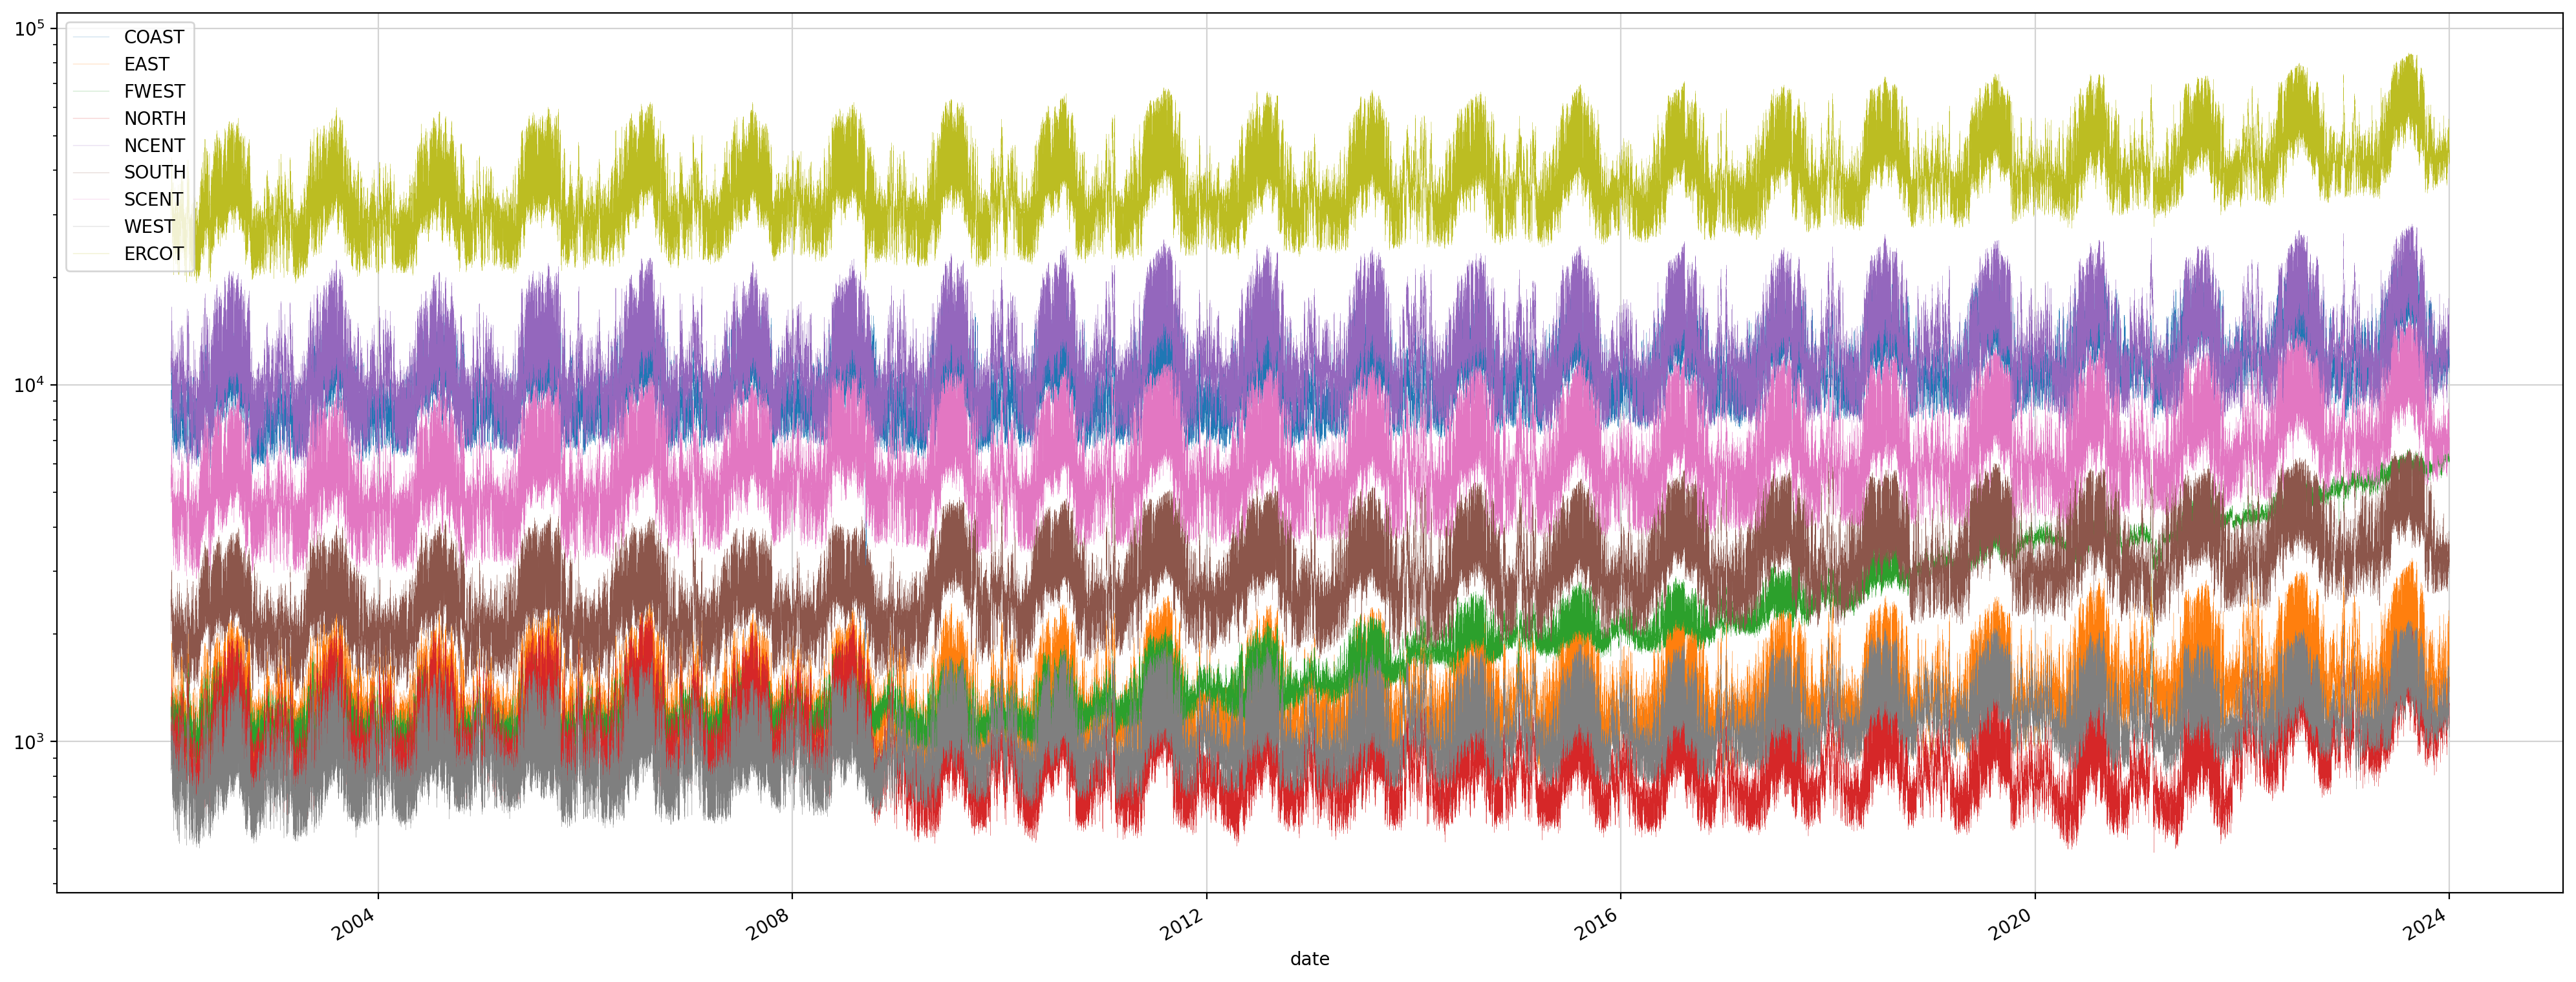

In [140]:
df.plot(figsize=(25,10), linewidth=0.1, logy=True)

In [167]:
df['date_time'] = df.reset_index()['date'].dt.round('h')

In [170]:
df

,COAST,EAST,FWEST,NORTH,NCENT,SOUTH,SCENT,WEST,ERCOT,date_time
date,,,,,,,,,,
2002-01-01 01:00:00.003,8331.469266,1111.096549,1094.045496,995.298392,10336.304899,2165.007571,4793.193560,843.747177,29670.162911,NaT
2002-01-01 01:59:59.997,8107.805431,1091.481584,1083.517981,981.195477,10178.052738,2092.374118,4766.918187,835.488188,29136.833703,NaT
2002-01-01 03:00:00.000,7890.721717,1080.257616,1085.038740,971.305257,10100.887710,2042.080714,4702.918892,830.694878,28703.905525,NaT
2002-01-01 04:00:00.003,7799.817527,1079.726403,1093.381853,971.262963,10081.565109,2011.935791,4669.064391,835.068413,28541.822450,NaT
2002-01-01 04:59:59.997,7815.968171,1087.934961,1106.651296,982.535591,10192.218670,2002.487678,4695.011904,848.598209,28731.406478,NaT
...,...,...,...,...,...,...,...,...,...,...
2023-12-31 20:00:00.000,11918.024426,1499.025843,6126.267426,1254.822945,12423.897835,3403.832421,6972.382083,1152.985583,44751.238564,NaT
2023-12-31 21:00:00.000,11634.439863,1500.317000,6140.141144,1245.641978,12226.078295,3247.225591,6742.135888,1156.842391,43892.822150,NaT
2023-12-31 22:00:00.000,11360.099483,1469.102629,6173.751239,1266.036106,12039.301095,3114.176086,6518.290964,1172.912329,43113.669932,NaT


# mySQL

# Task
Upload the concatenated DataFrame `df` to the BigQuery table `nyu-datasets.ercot.electricity`. First, reset the index of `df` to make the timestamp a column named 'date_time'. Define a BigQuery schema specifying 'date_time' as `TIMESTAMP` and all other columns as `FLOAT` with the description 'Electricity load in MW'. Create the dataset 'ercot' if it does not exist. Use `client.load_table_from_dataframe` to upload the data, ensuring the table is replaced if it exists. Finally, query and display the first 5 rows from `nyu-datasets.ercot.electricity` to verify the schema and data.

## Prepare DataFrame

### Subtask:
Reset the index of the DataFrame `df` and rename the timestamp column to prepare it for BigQuery upload.


**Reasoning**:
Reset the index of the DataFrame `df`, rename the 'date' column to 'date_time', and store the result in `df_bq` to prepare for BigQuery upload.



In [183]:
df_bq = df.reset_index().rename(columns={"date": "date_time"})

# Fix: Remove duplicate 'date_time' columns (keep the first one)
df_bq = df_bq.loc[:, ~df_bq.columns.duplicated()]

# Now accessing the column returns a Series, so .dt works
df_bq['date_time'] = df_bq['date_time'].dt.round('h')

## Upload Data

### Subtask:
Define the BigQuery schema, create the 'ercot' dataset, and upload the DataFrame `df_bq` to the 'electricity' table.


**Reasoning**:
Define the BigQuery schema, create the dataset, and upload the dataframe to the specified table.



In [184]:
# Define the schema
schema = [bigquery.SchemaField("date_time", "TIMESTAMP")]
for col in df_bq.columns:
    if col != 'date_time':
        schema.append(bigquery.SchemaField(col, "FLOAT", description="Electricity load in MW"))

# Create the dataset if it does not exist
dataset_id = f"{project_id}.ercot"
dataset = bigquery.Dataset(dataset_id)
client.create_dataset(dataset, exists_ok=True)

# Define the table ID
table_id = f"{project_id}.ercot.electricity"

# Explicitly delete the table if it exists to avoid duplicates
client.delete_table(table_id, not_found_ok=True)
print(f"Deleted table {table_id} if it existed.")

# Configure the load job
job_config = bigquery.LoadJobConfig(
    schema=schema,
    write_disposition=bigquery.WriteDisposition.WRITE_TRUNCATE
)

# Upload the dataframe
job = client.load_table_from_dataframe(
    df_bq, table_id, job_config=job_config
)

# Wait for the job to complete
job.result()

print(f"Loaded {job.output_rows} rows into {table_id}.")

Deleted table nyu-datasets.ercot.electricity if it existed.
Loaded 192840 rows into nyu-datasets.ercot.electricity.


The previous step indicates a successful upload. Let's verify the data by querying the `nyu-datasets.ercot.electricity` table.

In [185]:
# Query the table to verify the data
query = f"""
SELECT *
FROM `{project_id}.ercot.electricity`
LIMIT 5
"""
query_job = client.query(query)

print("Query results:")
df_result = query_job.to_dataframe()
display(df_result)

Query results:


,date_time,COAST,EAST,FWEST,NORTH,NCENT,SOUTH,SCENT,WEST,ERCOT
0,2002-01-01 01:00:00+00:00,8331.469266,1111.096549,1094.045496,995.298392,10336.304899,2165.007571,4793.193560,843.747177,29670.162911
1,2002-01-01 02:00:00+00:00,8107.805431,1091.481584,1083.517981,981.195477,10178.052738,2092.374118,4766.918187,835.488188,29136.833703
2,2002-01-01 03:00:00+00:00,7890.721717,1080.257616,1085.038740,971.305257,10100.887710,2042.080714,4702.918892,830.694878,28703.905525
3,2002-01-01 04:00:00+00:00,7799.817527,1079.726403,1093.381853,971.262963,10081.565109,2011.935791,4669.064391,835.068413,28541.822450
4,2002-01-01 05:00:00+00:00,7815.968171,1087.934961,1106.651296,982.535591,10192.218670,2002.487678,4695.011904,848.598209,28731.406478


## Verify Data
Query the table to ensure the data was uploaded correctly and the timestamp formatting is preserved.

In [ ]:
# Query the table to verify the data
query = f"""
SELECT *
FROM `{project_id}.ercot.electricity`
ORDER BY date_time
LIMIT 5
"""
query_job = client.query(query)

print("Query results:")
df_result = query_job.to_dataframe()
display(df_result)